In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

D:\software\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Question1

## 1. PCA

### 1.1 Scaling
<font size = 3>A function to standardize the data as 2-D array data type.</font>
<font size = 5><center>$z = \frac{x_i-μ(X)}{σ(X)}$</center></font>

In [2]:
def standardize_data(X):
         
    '''
    This function standardize an array, its substracts mean value, 
    and then divide the standard deviation.
    
    param 1: array 
    return: standardized array
    '''    
    rows, columns = X.shape
    
    standardizedArray = np.zeros(shape=(rows, columns))
    tempArray = np.zeros(rows)
    
    for column in range(columns):
        
        mean = np.mean(X[:,column])
        std = np.std(X[:,column])
        tempArray = np.empty(0)
        
        for element in X[:,column]:
            
            tempArray = np.append(tempArray, ((element - mean) / std))
 
        standardizedArray[:,column] = tempArray
    
    return standardizedArray

In [237]:
# # Standardizing data
X = [[7,4,3,4],
          [4,1,8,3],
          [6,3,5,2],
          [8,3,2,10],
          [4,5,0,9],
          [1,3,2,5],
          [6,6,3,2],
          [8,3,3,6]]
X = np.array(X)
X = standardize_data(X)
# X = standardize_img(X)

### 1.2 Convariance matrix
<font size = 3>Covariance matrices, like correlation matrices, contain information about the amount of variance shared between pairs of variables. That is our method of optimizing.</font>


<font size=4><center>$Covariance Matrix = \frac{1}{n-1}(X-\tilde{x})^T(X-\tilde{x})$</center></font>


In [238]:
# Calculating the covariance matrix

# covariance_matrix = np.cov(X.T)
covariance_matrix = (X.T@X) /( X.shape[0] - 1)
covariance_matrix

array([[ 1.14285714e+00,  1.35526185e-01, -2.97278203e-17,
         1.68261412e-01],
       [ 1.35526185e-01,  1.14285714e+00, -7.72827076e-01,
         5.32089304e-02],
       [-2.97278203e-17, -7.72827076e-01,  1.14285714e+00,
        -7.50665339e-01],
       [ 1.68261412e-01,  5.32089304e-02, -7.50665339e-01,
         1.14285714e+00]])

### 1.3 Eigenvectors and Eigenvalues
Eigendecomposition of the Covariance Matrix, we get project matrix from this.

In [239]:
# Using np.linalg.eig function
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[ 0.13644815  0.13976035  0.9089799  -0.36824516]
 [ 0.51054059 -0.499269   -0.26274585 -0.64887857]
 [-0.68503892 -0.70183311  0.18139953 -0.07243056]
 [ 0.50144979 -0.48849545  0.26798204  0.66189571]] 

Eigenvalues: 
 [2.26831228 0.07060051 1.15328872 1.07922706] 



### 1.4 Select principle components to get project matrix

In [240]:
# Calculating the explained variance on each of components
eigen_v_sort = np.flip(np.sort(eigen_values))
variance_explained = []
for i in eigen_v_sort:
     variance_explained.append((i/sum(eigen_v_sort))*100)
        
print(variance_explained)

[49.6193311513078, 25.22819072096042, 23.608091986225205, 1.5443861415065827]


In [241]:
# Find the eigenvector with the 2 highest contribution
# ranking by eigenvalues

cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[ 49.61933115  74.84752187  98.45561386 100.        ]


Text(0.5, 1.0, 'Explained variance vs Number of components')

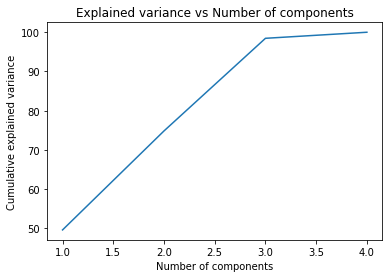

In [242]:
# Visualizing the eigenvalues and finding the "elbow" in the graphic
sns.lineplot(x = [1,2,3,4], y=cumulative_variance_explained)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")

In [243]:
print('Sorted eigenvalues: ',eigen_v_sort)
eigen_v_argsort = np.flip(np.argsort(eigen_values))
print('Ranked index of eigenvectors: ',eigen_v_argsort)

Sorted eigenvalues:  [2.26831228 1.15328872 1.07922706 0.07060051]
Ranked index of eigenvectors:  [0 2 3 1]


In [244]:
# Using the two largest components 
projection_matrix = (eigen_vectors.T[:][(eigen_v_argsort[:2])]).T
print(projection_matrix)

[[ 0.13644815  0.9089799 ]
 [ 0.51054059 -0.26274585]
 [-0.68503892  0.18139953]
 [ 0.50144979  0.26798204]]


### 1.5 Use project matrix to project data into lower dimension.

<font size = 4><center>$X_{pca} = X · P$</center></font>

In [245]:
# Getting the product of original standardized X and the eigenvectors 
X_pca = X.dot(projection_matrix)
print(X_pca)

[[ 0.15100763  0.39059057]
 [-2.83262452  0.04251018]
 [-1.23978299  0.14493442]
 [ 1.21585172  1.46588103]
 [ 2.13427285 -0.78910758]
 [-0.09174666 -1.85020038]
 [ 0.45982034 -0.57570604]
 [ 0.20320163  1.17109781]]


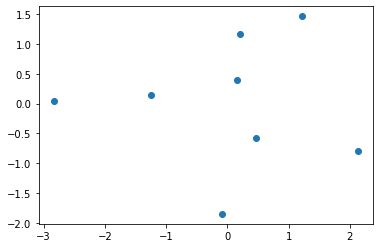

In [246]:
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.show()

In [284]:
(4 - sum(X.T[:][0]) / 8 ) / np.std(X.T[:][0])

-0.6708203932499369

In [258]:
np.std(X.T[:][0])

2.23606797749979

## SVD

In [142]:
X = [[7,4,3,4],
          [4,1,8,3],
          [6,3,5,2],
          [8,3,2,10],
          [4,5,0,9],
          [1,3,2,5],
          [6,6,3,2],
          [8,3,3,6]]
X = np.array(X)
# X = standardize_data(X)
def SVD_UV(M):
    eigen_values, eigen_vectors = np.linalg.eig(M)
    print("Eigenvector: \n",eigen_vectors,"\n")
    print("Eigenvalues: \n", np.real(np.round(eigen_values, decimals = 5)), "\n")
    # in this case, there are 4 eigenvectos
    V = []
    for i in range(len(eigen_values)):
        locals()['v'+str(i+1)] = eigen_vectors.T[i]
        V.append(locals()['v'+str(i+1)])
    V = np.array(V).T
    return V, eigen_vectors, eigen_values

### 2.1 Get matrix U
<font size = 4><center>$X=UΣV^T$</center></font>
<font size = 3>Get $XX^T$, </font>

<font size = 3>　then, $λ_1,λ_2,λ_3...λ_m$ are eigenvalues and $u_1,u_2,...u_m$ are eigenvectors. $U = [u_1　u_2　u_3　...　u_m]$<font>

In [162]:
U, e_vec, e_val = SVD_UV(X@X.T)
print(np.real(U))

Eigenvector: 
 [[-0.35879436+0.j         -0.13087218+0.j         -0.28210155+0.j
  -0.10937713+0.j         -0.69305193+0.j          0.11830377+0.j
   0.19237939+0.27083558j  0.19237939-0.27083558j]
 [-0.28185628+0.j         -0.55444447+0.j          0.63656428+0.j
   0.18285205+0.j          0.14329702+0.j         -0.40617149+0.j
  -0.24826586-0.09626346j -0.24826586+0.09626346j]
 [-0.29904526+0.j         -0.41572783+0.j         -0.10187329+0.j
  -0.00868583+0.j         -0.26148609+0.j          0.5980671 +0.j
   0.5859327 +0.j          0.5859327 -0.j        ]
 [-0.49389927+0.j          0.33677013+0.j          0.2283382 +0.j
  -0.43277044+0.j          0.2981359 +0.j         -0.02465343+0.j
   0.1621392 +0.13409572j  0.1621392 -0.13409572j]
 [-0.37730965+0.j          0.55209639+0.j          0.01359903+0.j
   0.36706183+0.j         -0.12062198+0.j         -0.23324755+0.j
  -0.04439811-0.222658j   -0.04439811+0.222658j  ]
 [-0.20822796+0.j          0.17480329+0.j          0.25822969+0.j
   0

### 2.2 Get matrix V
<font size = 4><center>$X=UΣV^T$</center></font>
<font size = 3>Get $X^TX$, </font>

<font size = 3>　then, $λ_1,λ_2,λ_3...λ_n$ are eigenvalues and $v_1,v_2,...v_n$ are eigenvectors. $V = [v_1　v_2　v_3　...　v_n]$<font>

In [163]:
V, e_vec, e_val = SVD_UV(X.T@X)
print(np.real(V))

Eigenvector: 
 [[ 0.63105699  0.23810187 -0.63073597 -0.3837274 ]
 [ 0.37716355 -0.05714198  0.71340467 -0.58782329]
 [ 0.32578001  0.74254078  0.30085856  0.50198078]
 [ 0.59445952 -0.62343844  0.05205803  0.50520526]] 

Eigenvalues: 
 [669.14457  80.19933  16.98129  28.6748 ] 

[[ 0.63105699  0.23810187 -0.63073597 -0.3837274 ]
 [ 0.37716355 -0.05714198  0.71340467 -0.58782329]
 [ 0.32578001  0.74254078  0.30085856  0.50198078]
 [ 0.59445952 -0.62343844  0.05205803  0.50520526]]


### 2.3 Get matrix Σ
<font size = 4><center>$X=UΣV^T$</center></font>


<font size = 3>Because U and V are orthogonal, so $U^{-1} = U^T, V^{-1} = V^T$</font>


<font size = 4><center>$Σ=U^TXV$</center></font>

In [164]:
print(U.shape)
print(V.shape)

(8, 8)
(4, 4)


In [165]:
# method 1
Sigma = U.T@X@V
Sigma = np.real(np.round(Sigma, decimals = 5))
Sigma

array([[-25.86783,  -0.     ,  -0.     ,  -0.     ],
       [ -0.     ,  -8.95541,   0.     ,  -0.     ],
       [ -0.     ,   0.     ,   0.     ,   5.35489],
       [ -0.     ,   0.     ,   4.12084,  -0.     ],
       [  0.     ,  -0.     ,   0.     ,  -0.     ],
       [ -0.     ,  -0.     ,   0.     ,   0.     ],
       [  0.     ,  -0.     ,  -0.     ,   0.     ],
       [  0.     ,  -0.     ,  -0.     ,   0.     ]])

In [166]:
#method2

dim = 4 # 1 ~ 4
Sigma = []
for i in range(dim):
    sig = list(np.zeros(dim))
    sig[i] = np.sqrt(e_val[i])
    Sigma.append(sig)
Sigma = np.array(Sigma)
Sigma

array([[25.86782891,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  8.95540787,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  4.12083655,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  5.35488596]])

### 2.4 Select U and V
The first 2 vectors that has the 2 largest eigenvalues to do dimension deduction.

In [167]:
V = V.T[:2].T
U = U.T[:2].T
# U = U[:,[0,2]]
# V = V[:,[0,2]]
print(U.shape)
print(V.shape)

(8, 2)
(4, 2)


In [168]:
U

array([[-0.35879436+0.j, -0.13087218+0.j],
       [-0.28185628+0.j, -0.55444447+0.j],
       [-0.29904526+0.j, -0.41572783+0.j],
       [-0.49389927+0.j,  0.33677013+0.j],
       [-0.37730965+0.j,  0.55209639+0.j],
       [-0.20822796+0.j,  0.17480329+0.j],
       [-0.31759845+0.j, -0.23075496+0.j],
       [-0.41457069+0.j, -0.02460867+0.j]])

In [169]:
dim = 2
low_Sigma = np.zeros([dim,dim])
selected_v = np.flip(np.sort(Sigma[Sigma!=0]))[:2]
for i in range(dim):
    low_Sigma[i][i] = selected_v[i]
low_Sigma

array([[25.86782891,  0.        ],
       [ 0.        ,  8.95540787]])

### 2.5 Calculate $X_{SVD}$
<font size = 4><center>$X_{SVD}=UΣ$</center></font>

[[ -9.28123122+0.j  -1.17201372+0.j]
 [ -7.29101013+0.j  -4.96527639+0.j]
 [ -7.73565166+0.j  -3.72301227+0.j]
 [-12.77610177+0.j   3.01591383+0.j]
 [ -9.76018138+0.j   4.9442484 +0.j]
 [ -5.38640526+0.j   1.56543473+0.j]
 [ -8.21558229+0.j  -2.06650476+0.j]
 [-10.72404369+0.j  -0.2203807 +0.j]]


D:\software\anaconda\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


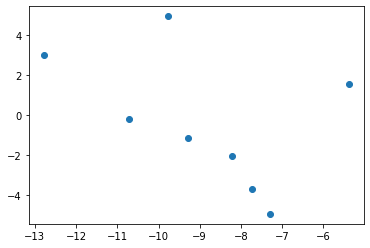

In [170]:
X_svd = U@low_Sigma
# X_svd = np.real(np.round(X_svd, decimals = 5))
print(X_svd)
plt.scatter(X_svd[:,0],X_svd[:,1])
plt.show()

### 2.6 Use scipy and sklearn to double check the SVD

U:    [[-0.35879436  0.13087218 -0.28210155 -0.10937713  0.09431428  0.43055152
  -0.48026244 -0.58109606]
 [-0.28185628  0.55444447  0.63656428  0.18285205  0.30929411  0.04165988
   0.23086321 -0.15428284]
 [-0.29904526  0.41572783 -0.10187329 -0.00868583 -0.25177775 -0.62156135
  -0.47749824  0.22260632]
 [-0.49389927 -0.33677013  0.2283382  -0.43277044 -0.41856906 -0.20151607
   0.32492461 -0.28606995]
 [-0.37730965 -0.55209639  0.01359903  0.36706183  0.55100295 -0.30790544
  -0.13931917  0.00937211]
 [-0.20822796 -0.17480329  0.25822969  0.57548639 -0.54773906  0.38103735
  -0.19613916  0.2110442 ]
 [-0.31759845  0.23075496 -0.61867822  0.36465993 -0.07383922 -0.0073497
   0.56970627 -0.008502  ]
 [-0.41457069  0.02460867 -0.05529814 -0.41029286  0.21857564  0.38195989
   0.00489438  0.6800256 ]]
Sigma:  [25.86782891  8.95540787  5.35488596  4.12083655]
V.T:  [[-0.63105699 -0.37716355 -0.32578001 -0.59445952]
 [ 0.23810187 -0.05714198  0.74254078 -0.62343844]
 [-0.3837274  -0.587

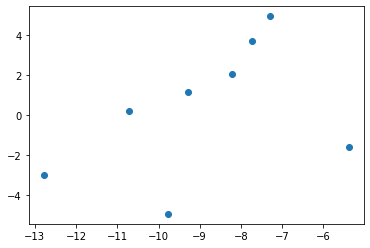

In [175]:
from scipy.linalg import svd
X = [[7,4,3,4],
          [4,1,8,3],
          [6,3,5,2],
          [8,3,2,10],
          [4,5,0,9],
          [1,3,2,5],
          [6,6,3,2],
          [8,3,3,6]]
X = np.array(X)
U, s, VT = svd(X)
print('U:   ',U)
print('Sigma: ',s)
print('V.T: ',VT)
Sigma = np.zeros([2,2])
dim = 2
for i in range(dim):
    Sigma[i][i] = s[i]
d_U = U.T[:2]
d_U = d_U.T
print('d_U:  ',d_U)
X_svd = d_U@Sigma
print(X_svd)
plt.scatter(X_svd[:,0],X_svd[:,1])
plt.show()

[[ 9.28123122  1.17201372]
 [ 7.29101013  4.96527639]
 [ 7.73565166  3.72301227]
 [12.77610177 -3.01591383]
 [ 9.76018138 -4.9442484 ]
 [ 5.38640526 -1.56543473]
 [ 8.21558229  2.06650476]
 [10.72404369  0.2203807 ]]


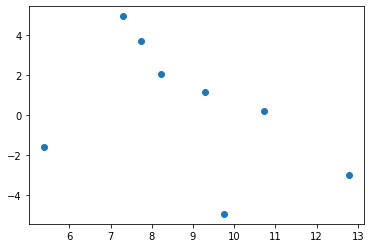

In [191]:
from sklearn.decomposition import TruncatedSVD
# define transform
svd = TruncatedSVD(n_components = 2)
# prepare transform on dataset
svd.fit(X)
# apply transform to dataset
X_svd = svd.transform(X)
print(X_svd)
plt.scatter(X_svd[:,0],X_svd[:,1])
plt.show()

# Question2

## 3. Implement PCA to MINIST dataset

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os


# I implement new standardize method to deal with the image data
def standardize_img(img_data):
    row, col = img_data.shape[0], img_data.shape[1]
    s_img = []
    for i in range(col):
        x = img_data[:,i].reshape(-1, 1)
        x = StandardScaler().fit_transform(x)
        s_img.append(x.reshape(1,row))
    s_img = np.array(s_img)
    result = np.zeros([row, col])
    for i in range(row):
        for j in range(col):
            result[i][j] = s_img[j][0][i]
    return result

# my implementation of PCA purly with Numpy
def myPCA(X, M):
    X = standardize_img(X)
    covariance_matrix = (X.T@X) / (X.shape[0] - 1)
    eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
    eigen_v_argsort = np.flip(np.argsort(eigen_values))
    values_ = eigen_values[eigen_v_argsort[:M]]
    components_ = (eigen_vectors.T[:][(eigen_v_argsort[:M])])
    projection_matrix = components_.T
    X_pca = X.dot(projection_matrix)
    print(eigen_v_argsort)
    return X_pca, components_, values_, eigen_vectors,eigen_values

# implementation of PCA of sklearn as reference
def useSkPCA(X, M):    
    X = standardize_img(X)
    pca = PCA(n_components=M)
    pca.fit(X)
    X_pca = pca.transform(X)
    ratio = pca.explained_variance_ratio_
    values = pca.explained_variance_
    comp = pca.components_
    print(np.flip(np.argsort(values)))
    return X_pca, ratio, values, comp

# load data
def load_raw(fname):
    img_set = []
    label_set = []
    with open(fname) as samples:
        for line in samples.readlines():
            line.strip()
            img, label = line.split('\t')
            img = [int(img_item) for img_item in img.split(' ')]
            img_set.append(img)
            label = int(label)
            label_set.append(label)
    img_set = np.array(img_set)
    label_set = np.array(label_set)
    return img_set, label_set

# save new data
def save_data(data, label,components_,  fname, M):
    np.savetxt(fname, data, delimiter = " ", fmt = '%.3f')
    np.savetxt(fname[:-4]+str(M)+'components.txt', components_, delimiter=" ", fmt = '%.3f')
    samples = open(fname, 'r+')
    pca_samp = open(fname[:-4]+str(M)+'_pca.txt', 'a')
    count = 0
    for line in samples.readlines():
        line.strip()
        # assign ID for each img to identify
        new_line = line[:-1]+'\t'+str(label[count])+'\t'+str(count)+'\n'
        count = count + 1
        pca_samp.write(new_line)
    samples.close()
    pca_samp.close()
    os.remove(fname)
    print('PCA data saved as: ', fname[:-4]+str(M)+'pca.txt')
    print('Components saved as: ',fname[:-4]+str(M)+'components.txt')
    
    
def visualize_eigenPic(reduce_dim,num_viz_pca,pv_dir):
    # load principle vectors from your local machine, e.g., here we suppose that the PCA vectors of the training
    # set is stored in a file named 'pca_components_20' in the ./mnist/ directory
#     pv_dir = 'mnist/pca_components_' + str(reduce_dim)
    
    pvs = np.empty((reduce_dim, 784))
    with open(pv_dir, 'r') as f:
        # Some pre-processing steps, depending on how you store your principle vectors
        # Here, we suppose that each row is corresponding to a principle vectors with string
        # type, e.g, a row can be: '0.5, 0.2, 0.3, ..., 0.21', each element is separated by ','.
        for k, line in enumerate(f.readlines()):
            line = line.strip().split(' ')
            # the k-th principle vectors
            pv_k = np.array(list(map(float, line)))
            pvs [k] = pv_k

    # visualize the principle vectors
    fig, ax = plt.subplots(num_viz_pca // 5, 5)
    # YOU NEED TO FILL IN YOUR SID IN THE FOLLOWING LINE
    fig.suptitle('Visualization of Eigendigits ({})'.format('1155161048'))
    ax = ax.reshape(-1)
    for k, pv in enumerate(pvs [:num_viz_pca]):
        pv = pv.reshape(28, 28)
        ax[k].imshow(pv, cmap='gray')
        ax[k].set_title('pv-{}'.format(k + 1))
        ax[k].axis('off')

    fig.savefig('./viz_pca_vectors_{}.png'.format(num_viz_pca))



### 3.1 Test the correctness of myPCA from Question1 using PCA - sklearn package

In [368]:
X = [[7,4,3,4],
          [4,1,8,3],
          [6,3,5,2],
          [8,3,2,10],
          [4,5,0,9],
          [1,3,2,5],
          [6,6,3,2],
          [8,3,3,6]]
X = np.array(X)
test_pca1, components_, values_, eigen_vectors,eigen_values = myPCA(X, 2)
test_pca2, test_ratio, test_values, test_comp = useSkPCA(X, 2)
print(test_pca1)
print(test_pca2)
print('I get the same result with standard sklearn PCA package! Woooh~')
print('The result are only different in scale.')

[[ 0.15100763  0.39059057]
 [-2.83262452  0.04251018]
 [-1.23978299  0.14493442]
 [ 1.21585172  1.46588103]
 [ 2.13427285 -0.78910758]
 [-0.09174666 -1.85020038]
 [ 0.45982034 -0.57570604]
 [ 0.20320163  1.17109781]]
[[-0.15100763 -0.39059057]
 [ 2.83262452 -0.04251018]
 [ 1.23978299 -0.14493442]
 [-1.21585172 -1.46588103]
 [-2.13427285  0.78910758]
 [ 0.09174666  1.85020038]
 [-0.45982034  0.57570604]
 [-0.20320163 -1.17109781]]
I get the same result with standard sklearn PCA package! Woooh~
The result are only different in scale.


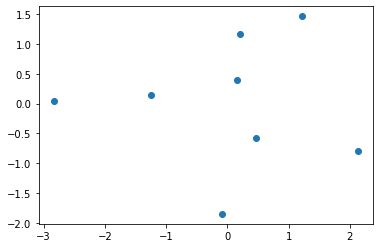

In [360]:
plt.scatter(test_pca1[:,0],test_pca1[:,1])
plt.show()

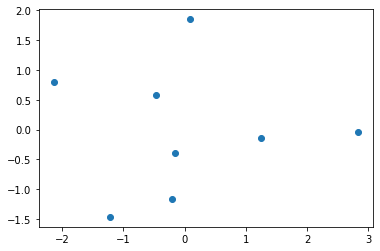

In [361]:
plt.scatter(test_pca2[:,0],test_pca2[:,1])
plt.show()

### 3.2 Dimension reduction for MINIST dataset

In [12]:
fname = './train.txt'
train_data, train_label = load_raw(fname)
fname = './test.txt'
test_data, test_label = load_raw(fname)

In [13]:
print(train_data.shape)
print(test_data.shape)
M = 30 # new dimension

(60000, 784)
(10000, 784)


##### Use my original function

In [29]:
%%time
test_data_pca, components_test, values_test, eig_vec_test, eig_val_test = myPCA(test_data, M)
train_data_pca, components_train, values_train, eig_vec_train, eig_val_train = myPCA(train_data, M)
# save_data(test_data_pca, test_label , components_, 'test_my_.txt', M)
save_data(train_data_pca, train_label, components_train, 'train_my_.txt', M)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  50  49  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  80  79  81  82  83  84  85  86  87  88  89
  90  92  93  91  94  95  96  97  98  99 100 103 101 102 104 105 106 108
 107 110 111 109 112 113 119 114 115 116 117 118 121 120 123 124 132 126
 129 125 131 130 128 127 122 133 134 135 136 137 140 141 139 138 142 143
 145 146 148 147 144 149 150 151 152 153 154 155 158 156 157 159 160 161
 162 163 165 166 164 167 168 169 170 171 172 173 174 176 179 180 186 184
 183 193 185 191 189 190 188 192 181 182 187 178 177 175 196 195 197 198
 199 200 201 202 203 204 205 206 207 210 211 209 208 212 213 215 216 217
 218 219 220 224 233 227 235 228 234 229 239 230 236 238 237 231 232 240
 226 225 223 222 221 214 241 243 244 245 242 246 24

In [28]:
M = 30

##### Use sklearn PCA function

In [365]:
%%time
test_data_pca, _, values_, components_= useSkPCA(test_data, M)
train_data_pca, _, values_, components_ = useSkPCA(train_data, M)
save_data(test_data_pca, test_label , components_, 'test_skt_.txt', M)
save_data(train_data_pca, train_label, components_, 'train_skt_.txt', M)

PCA data saved as:  test_skt_20pca.txt
Components saved as:  test_skt_20components.txt
PCA data saved as:  train_skt_20pca.txt
Components saved as:  train_skt_20components.txt
Wall time: 1min 39s


#### Double check: my implementation of PCA

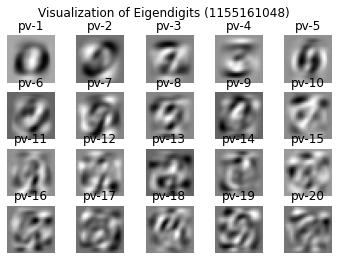

In [24]:
M = 20
reduce_dim = M
num_viz_pca = 20
# pv_dir = 'test_my_'+str(M)+'components.txt'
pv_dir = 'train_my_'+str(M)+'components.txt'

visualize_eigenPic(reduce_dim,num_viz_pca, pv_dir)

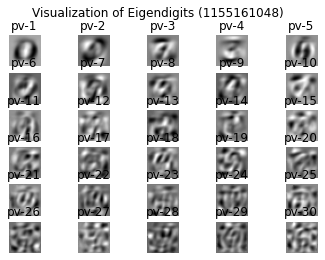

In [25]:
M = 30
reduce_dim = M
num_viz_pca = 30
pv_dir = 'train_my_'+str(M)+'components.txt'
# pv_dir = 'train_my_'+str(M)+'components.txt'

visualize_eigenPic(reduce_dim,num_viz_pca, pv_dir)

In [26]:
a = [1,2,3,4,5]
a[-3:]

[3, 4, 5]

#### Double check: third party sklearn implementation of PCA

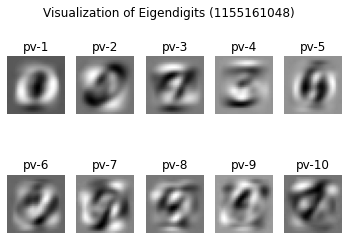

In [367]:
reduce_dim = M
num_viz_pca = 10
# pv_dir = 'test_my_'+str(M)+'components.txt'
pv_dir = 'test_skt_'+str(M)+'components.txt'

visualize_eigenPic(reduce_dim,num_viz_pca, pv_dir)

### 3.3 Clustering result

In [375]:
# TODOs
# 1. count the number of images belong to this cluster
# 2. find the major label for this cluster
# 3. count the number of correctly clustered images
# 4. cal the calssification accuracy
# Files needed: a) K-means result, b)train.txt

import sys
import os
import numpy as np
import gc
import pandas as pd

random_seed = 1001
train_file = './train_my_20_pca.txt'
cluster_file = './cluster_'+str(random_seed)+'.txt'

img_train = []
label_train = []
ID_train = []
with open(train_file) as samples:
    for line in samples.readlines():
        line = line.strip()
        img, label,ID = line.split('\t')
        label = int(label)
        # img = [int(img_item) for img_item in img.split(' ')]
        img_train.append(img)
        label_train.append(label)
        ID_train.append(ID)
# ground truth table

GT = pd.DataFrame({'label':label_train, 'img':img_train, 'ID':ID_train})

del img_train, label_train, ID_train
gc.collect()



img_cluster = []
index_cluster = []
ID_cluster = []
with open(cluster_file) as data:
    for line in data.readlines():
        line = line.strip()
        index, img, ID = line.split('\t')
        index = int(index)
        # img = [int(img_item) for img_item in img.split(' ')]
        img_cluster.append(img)
        index_cluster.append(index)
        ID_cluster.append(ID)

cluster_result = pd.DataFrame({'index':index_cluster, 'img':img_cluster, 'ID':ID_cluster})

del img_cluster, index_cluster
gc.collect()

GT_cluster = GT.merge(cluster_result, how = 'left', on='ID')

del GT, cluster_result
gc.collect()
GT_cluster.drop(columns = 'img_y', axis = 1, inplace = True)
GT_cluster.rename({'img_x':'img'}, axis = 1, inplace = True)

GT_cluster

,label,img,ID,index
0,5,0.922 -4.815 -0.068 -8.051 -0.985 0.952 0.336 ...,0,6
1,0,-8.709 -7.754 3.448 -1.668 0.835 -5.145 -0.272...,1,0
2,4,-2.328 9.431 6.184 1.725 4.092 2.291 18.692 -3...,2,5
3,1,6.582 -3.746 -3.691 -0.461 5.627 3.462 1.561 4...,3,9
4,9,5.183 3.133 6.278 1.460 -1.609 -0.613 -0.580 3...,4,7
...,...,...,...,...
59995,8,2.039 -5.119 -0.375 -4.688 -0.646 2.902 -0.222...,59995,6
59996,3,-0.608 -6.498 -3.507 -8.397 -1.010 1.240 3.968...,59996,6
59997,5,3.777 -3.231 3.806 -7.504 -1.362 -2.879 1.698 ...,59997,3
59998,6,-1.722 -4.948 -0.007 7.151 -0.925 -5.067 3.643...,59998,8


In [376]:
num_train_images = list(GT_cluster['index'].value_counts().sort_index())
# group by index
for i in range(10):
    name='index_'+str(i)
    locals()['index_'+str(i)]=GT_cluster[GT_cluster['index'] == i]

num_correct = []
major_label = []
acc = [] # acc
for i in range(10):
    n_c = locals()['index_'+str(i)]['label'].value_counts().max()
    m_l = locals()['index_'+str(i)]['label'].value_counts().idxmax()
    n_a = len(locals()['index_'+str(i)]) # number of images in this index
    num_correct.append(n_c)
    major_label.append(m_l)
    acc.append((n_c / n_a)*100)

result = pd.DataFrame({'#train images to this cluster': num_train_images, 'major label': major_label,
                      '#correct clustered':num_correct, 'accuracy': acc})
print('sum of images:', sum(result['#train images to this cluster']), '#correct clustered:', sum(result['#correct clustered']),
                           'avg acc: ',  sum(result['#correct clustered']) / sum(result['#train images to this cluster']))
result

sum of images: 60000 #correct clustered: 29490 avg acc:  0.4915


,#train images to this cluster,major label,#correct clustered,accuracy
0,6166,3,2007,32.549465
1,3188,0,2709,84.974906
2,3727,2,1884,50.550040
3,5464,5,1912,34.992679
4,3612,2,1401,38.787375
5,5100,4,1723,33.784314
6,6031,8,3030,50.240424
7,9780,7,3704,37.873211
8,6050,6,4566,75.471074
9,10882,1,6554,60.227899


## Question3

#### 1. Item-Item Collaborative Filtering


In [188]:
# rating matrix
R = [
    [2,1,5,4,3,np.nan],
    [np.nan, 2, np.nan,3, 5,4],
    [5,np.nan,4,1,4,2],
    [2,3,4,5,np.nan, np.nan],
    [np.nan,4,1,np.nan,3,2]
]

# goal: R[3][4]
R = np.array(R)

In [86]:
sims = []
for i in range(6):
    a = R.T[4] - np.nanmean(R.T[4])
    b = R.T[i] - np.nanmean(R.T[i])
    a[np.isnan(a)] = 0
    b[np.isnan(b)] = 0
    print(b)
    sim = np.corrcoef(a,b)[0][1]
    sims.append(sim)
print('similarity',sims)    

[-1.  0.  2. -1.  0.]
[-1.5 -0.5  0.   0.5  1.5]
[ 1.5  0.   0.5  0.5 -2.5]
[ 0.75 -0.25 -2.25  1.75  0.  ]
[-0.75  1.25  0.25  0.   -0.75]
[ 0.          1.33333333 -0.66666667  0.         -0.66666667]
similarity [0.30772872744833185, -0.1685499656158105, 0.17588161767036212, -0.2930471350766347, 1.0, 0.7385489458759964]


In [84]:
index1 =np.flip(np.argsort(sims))[2:4][0]
index2 = np.flip(np.argsort(sims))[2:4][1]
w1 = sims[index1]
w2 = sims[index2]
pred = (w1*R.T[index1][3] + w2 * R.T[index2][3]) / (w1 + w2)
print(pred)

2.727369128661609


#### 2. User-User Collaborative Filtering


In [91]:
sims = []
for i in range(5):
    a = R[3] - np.nanmean(R[3])
    b = R[i] - np.nanmean(R[i])
    a[np.isnan(a)] = 0
    b[np.isnan(b)] = 0
    print(b)
    sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
#     sim = np.corrcoef(a,b)[0][1]
    sims.append(sim)
print('similarity',sims)


[-1. -2.  2.  1.  0.  0.]
[ 0.  -1.5  0.  -0.5  1.5  0.5]
[ 1.8  0.   0.8 -2.2  0.8 -1.2]
[-1.5 -0.5  0.5  1.5  0.   0. ]
[ 0.   1.5 -1.5  0.   0.5 -0.5]
similarity [0.7071067811865475, 0.0, -0.7620634755325442, 0.9999999999999998, -0.29999999999999993]


In [92]:
index1 =np.flip(np.argsort(sims))[1:3][0]
index2 = np.flip(np.argsort(sims))[1:3][1]
w1 = sims[index1]
w2 = sims[index2]
pred = (w1*R[index1][4] + w2 * R.T[index2][4]) / (w1 + w2)
print(pred)

3.0


#### 3. Matrix Factorization

In [249]:
#!/usr/bin/python
#
# Created by Albert Au Yeung (2010)
#
# An implementation of matrix factorization
#
try:
    import numpy
except:
    print("This implementation requires the numpy module.")
    exit(0)

###############################################################################

"""
@INPUT:
    R     : a matrix to be factorized, dimension N x M
    P     : an initial matrix of dimension N x K
    Q     : an initial matrix of dimension M x K
    K     : the number of latent features
    steps : the maximum number of steps to perform the optimisation
    alpha : the learning rate
    beta  : the regularization parameter
@OUTPUT:
    the final matrices P and Q
"""
######################### Original #############################################
def bug_matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if step % 2000 == 0:
            print('loss:',e)
        if e < 0.001:
            break
    return P, Q.T


##################### Use Temp ################################
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        # we should use old P value to update Q
                        P_temp = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q_temp = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
                        P[i][k] = P_temp
                        Q[k][j] = Q_temp
        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if step % 2000 == 0:
            print('loss:',e)
        if e < 0.001:
            break
    return P, Q.T

######################### Use old table ##############################
# def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
#     Q = Q.T
#     for step in range(steps):
#         Q_old = Q
#         P_old = P
#         for i in range(len(R)):
#             for j in range(len(R[i])):
#                 if R[i][j] > 0:
#                     eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
#                     for k in range(K):
#                         # we should use old P value to update Q
#                         P[i][k] = P[i][k] + alpha * (2 * eij * Q_old[k][j] - beta * P[i][k])
#                         Q[k][j] = Q[k][j] + alpha * (2 * eij * P_old[i][k] - beta * Q[k][j])
#         eR = numpy.dot(P,Q)
#         e = 0
#         for i in range(len(R)):
#             for j in range(len(R[i])):
#                 if R[i][j] > 0:
#                     e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
#                     for k in range(K):
#                         e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
#         if step % 2000 == 0:
#             print('loss:',e)
#         if e < 0.001:
#             break
#     return P, Q.T


################################################################
R = [
    [2,1,5,4,3,np.nan],
    [np.nan, 2, np.nan,3, 5,4],
    [5,np.nan,4,1,4,2],
    [2,3,4,5,np.nan, np.nan],
    [np.nan,4,1,np.nan,3,2]
]

R = numpy.array(R)

#### K = 5: Latent feature is 5.

In [246]:
config = {
    'steps': 20000,
    'alpha':0.001,
    'beta': 0.02,
    'K': 5,
    'seed':2022
}
N = len(R)
M = len(R[0])
K = config['K']

print('---matrix factorization without bug---')
numpy.random.seed(config['seed'])
P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)
nP, nQ = matrix_factorization(R, P, Q, config['K'], config['steps'], config['alpha'], config['beta'])
nR = numpy.dot(nP, nQ.T)
print('prediction result:',nR[3][4])

print('---matrix factorization with bug---')
numpy.random.seed(config['seed'])
P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)
nP, nQ = bug_matrix_factorization(R, P, Q, config['K'], config['steps'], config['alpha'], config['beta'])
nR = numpy.dot(nP, nQ.T)
print('prediction result:',nR[3][4])

---matrix factorization without bug---
loss: 115.15941820924297
loss: 2.1919335322802587
loss: 2.162208998044252
loss: 2.1440971647548923
loss: 2.1328026985670734
loss: 2.1255645091797666
loss: 2.1207803432701433
loss: 2.1175135458708776
loss: 2.1152100297149863
loss: 2.11353650292119
prediction result: 3.371551540207195
---matrix factorization with bug---
loss: 115.15139010751504
loss: 2.1919804903960993
loss: 2.16225220485502
loss: 2.1441320487619167
loss: 2.132829207157622
loss: 2.125584046896405
loss: 2.120794533512445
loss: 2.1175237980526784
loss: 2.1152174437171953
loss: 2.113541895126308
prediction result: 3.371627196107824


#### K = 4: Latent feature is 4.

In [247]:
config = {
    'steps': 20000,
    'alpha':0.001,
    'beta': 0.02,
    'K': 4,
    'seed':2022
}

N = len(R)
M = len(R[0])
K = config['K']

print('---matrix factorization without bug---')
numpy.random.seed(config['seed'])
P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)
nP, nQ = matrix_factorization(R, P, Q, config['K'], config['steps'], config['alpha'], config['beta'])
nR = numpy.dot(nP, nQ.T)
print('prediction result:',nR[3][4])

print('---matrix factorization with bug---')
numpy.random.seed(config['seed'])
P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)
nP, nQ = bug_matrix_factorization(R, P, Q, config['K'], config['steps'], config['alpha'], config['beta'])
nR = numpy.dot(nP, nQ.T)
print('prediction result:',nR[3][4])

---matrix factorization without bug---
loss: 130.16521120768215
loss: 2.1555623148434
loss: 2.138547309906638
loss: 2.13232211032492
loss: 2.128050177578919
loss: 2.1249381282023116
loss: 2.1225525265334344
loss: 2.120648679493193
loss: 2.119083560292019
loss: 2.1177697424048474
prediction result: 3.8933722122588046
---matrix factorization with bug---
loss: 130.1573156887477
loss: 2.1552576252238387
loss: 2.138428540480703
loss: 2.13229328512433
loss: 2.1280660886097498
loss: 2.1249752907186124
loss: 2.122598719037936
loss: 2.120697583794476
loss: 2.119131967546837
loss: 2.1178160880899153
prediction result: 3.894096603597353


#### K = 3: Latent feature is 3.

In [248]:
config = {
    'steps': 20000,
    'alpha':0.001,
    'beta': 0.02,
    'K': 3,
    'seed':2022
}

N = len(R)
M = len(R[0])
K = config['K']

print('---matrix factorization without bug---')
numpy.random.seed(config['seed'])
P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)
nP, nQ = matrix_factorization(R, P, Q, config['K'], config['steps'], config['alpha'], config['beta'])
nR = numpy.dot(nP, nQ.T)
print('prediction result:',nR[3][4])


print('---matrix factorization with bug---')
numpy.random.seed(config['seed'])
P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)
nP, nQ = bug_matrix_factorization(R, P, Q, config['K'], config['steps'], config['alpha'], config['beta'])
nR = numpy.dot(nP, nQ.T)
print('prediction result:',nR[3][4])

---matrix factorization without bug---
loss: 156.66533049221385
loss: 2.308218201678767
loss: 2.1939000551328043
loss: 2.177345375268604
loss: 2.1685430629610747
loss: 2.1637171639747828
loss: 2.160974486755346
loss: 2.159354244880864
loss: 2.158358864370828
loss: 2.1577238171927915
prediction result: 3.4068988876470887
---matrix factorization with bug---
loss: 156.6567149019913
loss: 2.3095077909769777
loss: 2.1937351505581697
loss: 2.1772614998001782
loss: 2.168502384603019
loss: 2.1636991121688522
loss: 2.1609679536857427
loss: 2.1593532735467793
loss: 2.1583603356080805
loss: 2.157726153623477
prediction result: 3.4066860745949143
